
 Statistici descriptive:
        Time_Standard   Time_AMID  Errors_Standard  Errors_AMID  \
count      20.000000   20.000000        20.000000    20.000000   
mean      145.750000  125.750000         4.100000     3.100000   
std         7.676862    7.676862         0.852242     0.852242   
min       133.000000  113.000000         3.000000     2.000000   
25%       138.750000  118.750000         3.000000     2.000000   
50%       146.500000  126.500000         4.000000     3.000000   
75%       150.500000  130.500000         5.000000     4.000000   
max       160.000000  140.000000         5.000000     4.000000   

       Satisfaction_Standard  Satisfaction_AMID  
count              20.000000          20.000000  
mean               72.800000          82.800000  
std                 3.412053           3.412053  
min                68.000000          78.000000  
25%                69.750000          79.750000  
50%                73.000000          83.000000  
75%                75.250000

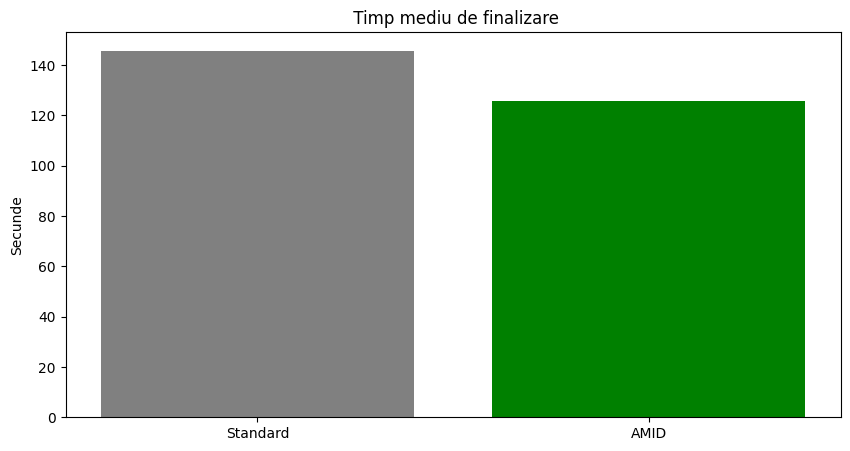

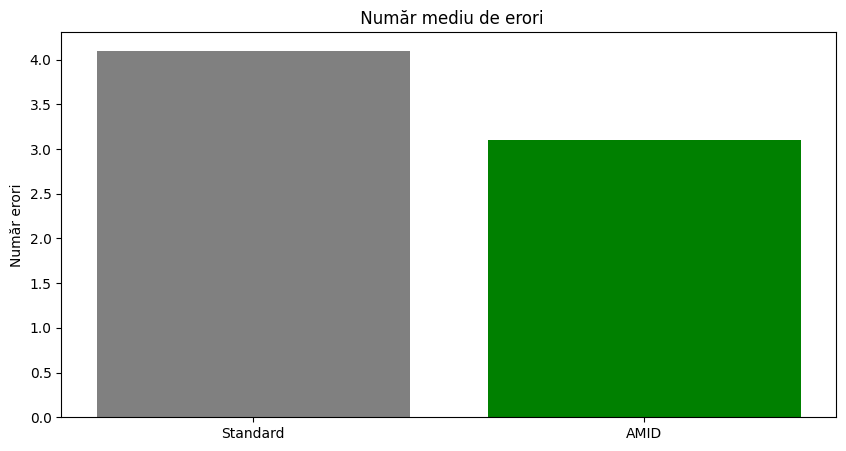

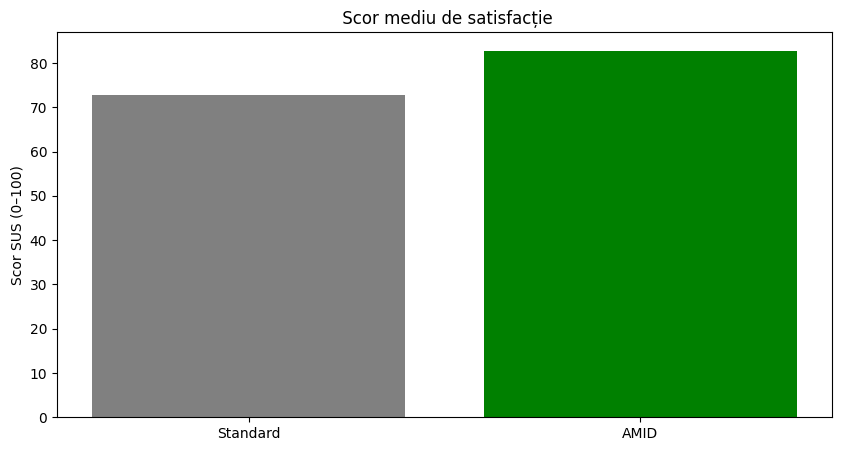

 Datele au fost salvate în results.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Citire fișier corect și curățare 
df = pd.read_csv("input_data_experiment.csv", sep=";", encoding="utf-8")
df.columns = df.columns.str.strip().str.replace('\ufeff', '')

# Simulare îmbunătățiri AMID 
df["Time_AMID"] = df["Time_Standard"] - 20
df["Errors_AMID"] = df["Errors_Standard"] - 1
df["Satisfaction_AMID"] = df["Satisfaction_Standard"] + 10

# Calcul îmbunătățiri procentuale 
df["Δ_time(%)"] = ((df["Time_AMID"] - df["Time_Standard"]) / df["Time_Standard"]) * 100
df["Δ_errors(%)"] = ((df["Errors_AMID"] - df["Errors_Standard"]) / df["Errors_Standard"]) * 100
df["Δ_satisfaction(%)"] = ((df["Satisfaction_AMID"] - df["Satisfaction_Standard"]) / df["Satisfaction_Standard"]) * 100

# Statistici descriptive 
summary = df[["Time_Standard", "Time_AMID", "Errors_Standard", "Errors_AMID", 
               "Satisfaction_Standard", "Satisfaction_AMID"]].describe()
print("\n Statistici descriptive:\n", summary)

# Vizualizări comparative 
plt.figure(figsize=(10, 5))
plt.bar(["Standard", "AMID"], [df["Time_Standard"].mean(), df["Time_AMID"].mean()], color=["gray", "green"])
plt.title(" Timp mediu de finalizare")
plt.ylabel("Secunde")
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(["Standard", "AMID"], [df["Errors_Standard"].mean(), df["Errors_AMID"].mean()], color=["gray", "green"])
plt.title(" Număr mediu de erori")
plt.ylabel("Număr erori")
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(["Standard", "AMID"], [df["Satisfaction_Standard"].mean(), df["Satisfaction_AMID"].mean()], color=["gray", "green"])
plt.title(" Scor mediu de satisfacție")
plt.ylabel("Scor SUS (0–100)")
plt.show()

# Salvare rezultate complete
df.to_csv("results.csv", index=False)
print(" Datele au fost salvate în results.csv")
